In [78]:
import pandas as pd
import numpy as np 
import string 
import spacy 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [79]:
musk = pd.read_csv('Elon_musk.csv',
                   encoding='latin',
                   error_bad_lines = False)
musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [80]:
musk=musk['Text']
musk

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [81]:
# remove both the leading and the trailing characters
musk = [y.strip() for y in musk]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [82]:
# removes empty strings, because they are considered in Python as False
musk = [x for x in musk if x] 
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [83]:
# Joining the list into one string/text
text = ' '.join(musk)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [84]:
#Punctuation
no_punc_text = text.translate(str.maketrans("\x92", "'", string.punctuation)) 
no_punc_text

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [85]:
#Tokenization
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',

In [86]:
text_tokens[0:72]

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed']

In [87]:
len(text_tokens)

21373

In [88]:
from nltk.corpus import stopwords

In [89]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [90]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['kunalb11', 'I', "'m", 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just']


In [91]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [92]:

#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [93]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_trf')

In [94]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought


In [95]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['kunalb11', 'I', "'", 'm', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'Spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'congratulation']


In [96]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [97]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,kunalb11,alien,idaacarmack,ray,tracing,cyberpunk,hdr,nextlevel,have,try,...,priority,surreal,propaganda,social,httpstcowjrzibkh1h,click,samwise,gamgee,altho,dumber
0,2702,231,2440,3619,4488,963,1676,3153,1671,4524,...,3509,4245,3544,4033,2332,774,3818,1530,246,1157


In [98]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
kunalb11,2702
alien,231
idaacarmack,2440
ray,3619
tracing,4488
...,...
click,774
samwise,3818
gamgee,1530
altho,246


In [99]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

,0
ðogecoin,4955
zzcool,4954
zwiebelbach,4953
zubinanary,4952
zshauladventure,4951
zone,4950
zon,4949
zogfotpik,4948
zip2,4947
zikryzamir,4946


In [100]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

,0
005,0
10,1
100,2
1000,3
10000,4
107,5
10x,6
11,7
112,8
11thhour,9


In [101]:
print(vectorizer.vocabulary_)

{'kunalb11': 2702, 'alien': 231, 'idaacarmack': 2440, 'ray': 3619, 'tracing': 4488, 'cyberpunk': 963, 'hdr': 1676, 'nextlevel': 3153, 'have': 1671, 'try': 4524, 'joerogan': 2623, 'spotify': 4111, 'great': 1611, 'interview': 2552, 'gtera27': 1629, 'doge': 1112, 'underestimate': 4655, 'teslacn': 4334, 'congratulation': 856, 'tesla': 4328, 'china': 740, 'amazing': 256, 'execution': 1322, 'last': 2721, 'year': 4924, 'now': 3192, 'next': 3152, 'even': 1293, 'happy': 1658, 'new': 3149, 'ox': 3311, 'httpstco9wfkmyu2oj': 1867, 'frodo': 1493, 'underdoge': 4654, 'all': 233, 'think': 4405, 'would': 4900, 'fail': 1358, 'himself': 1722, 'httpstcozgxjfdzzrm': 2400, 'owensparks': 3308, 'flcnhvy': 1433, 'anonyx10': 285, 'haha': 1644, 'thank': 4371, 'indeed': 2490, 'tweet': 4543, 'definitely': 1018, 'represent': 3701, 'realworld': 3644, 'time': 4431, 'allocation': 235, 'the': 4379, 'entertaining': 1250, 'outcome': 3288, 'likely': 2783, 'givedirectly': 1581, 'just': 2650, 'send': 3885, 'agree': 200, 'cl

In [102]:
print(vectorizer.get_feature_names()[50:100])

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']


In [103]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [104]:
print(X.toarray().shape)

(16023, 4956)


In [105]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(musk)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [106]:
print(vectorizer_ngram_range.get_feature_names())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']


In [107]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="",
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(musk)

In [109]:
print(vectorizer_n_gram_max_features.get_feature_names())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']


In [110]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         4.07911388]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [111]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    
    plt.figure(figsize=(60, 40))    # Set figure size

    
    plt.imshow(wordcloud)           # Display image
    
    
    plt.axis("off")                 # No axis details

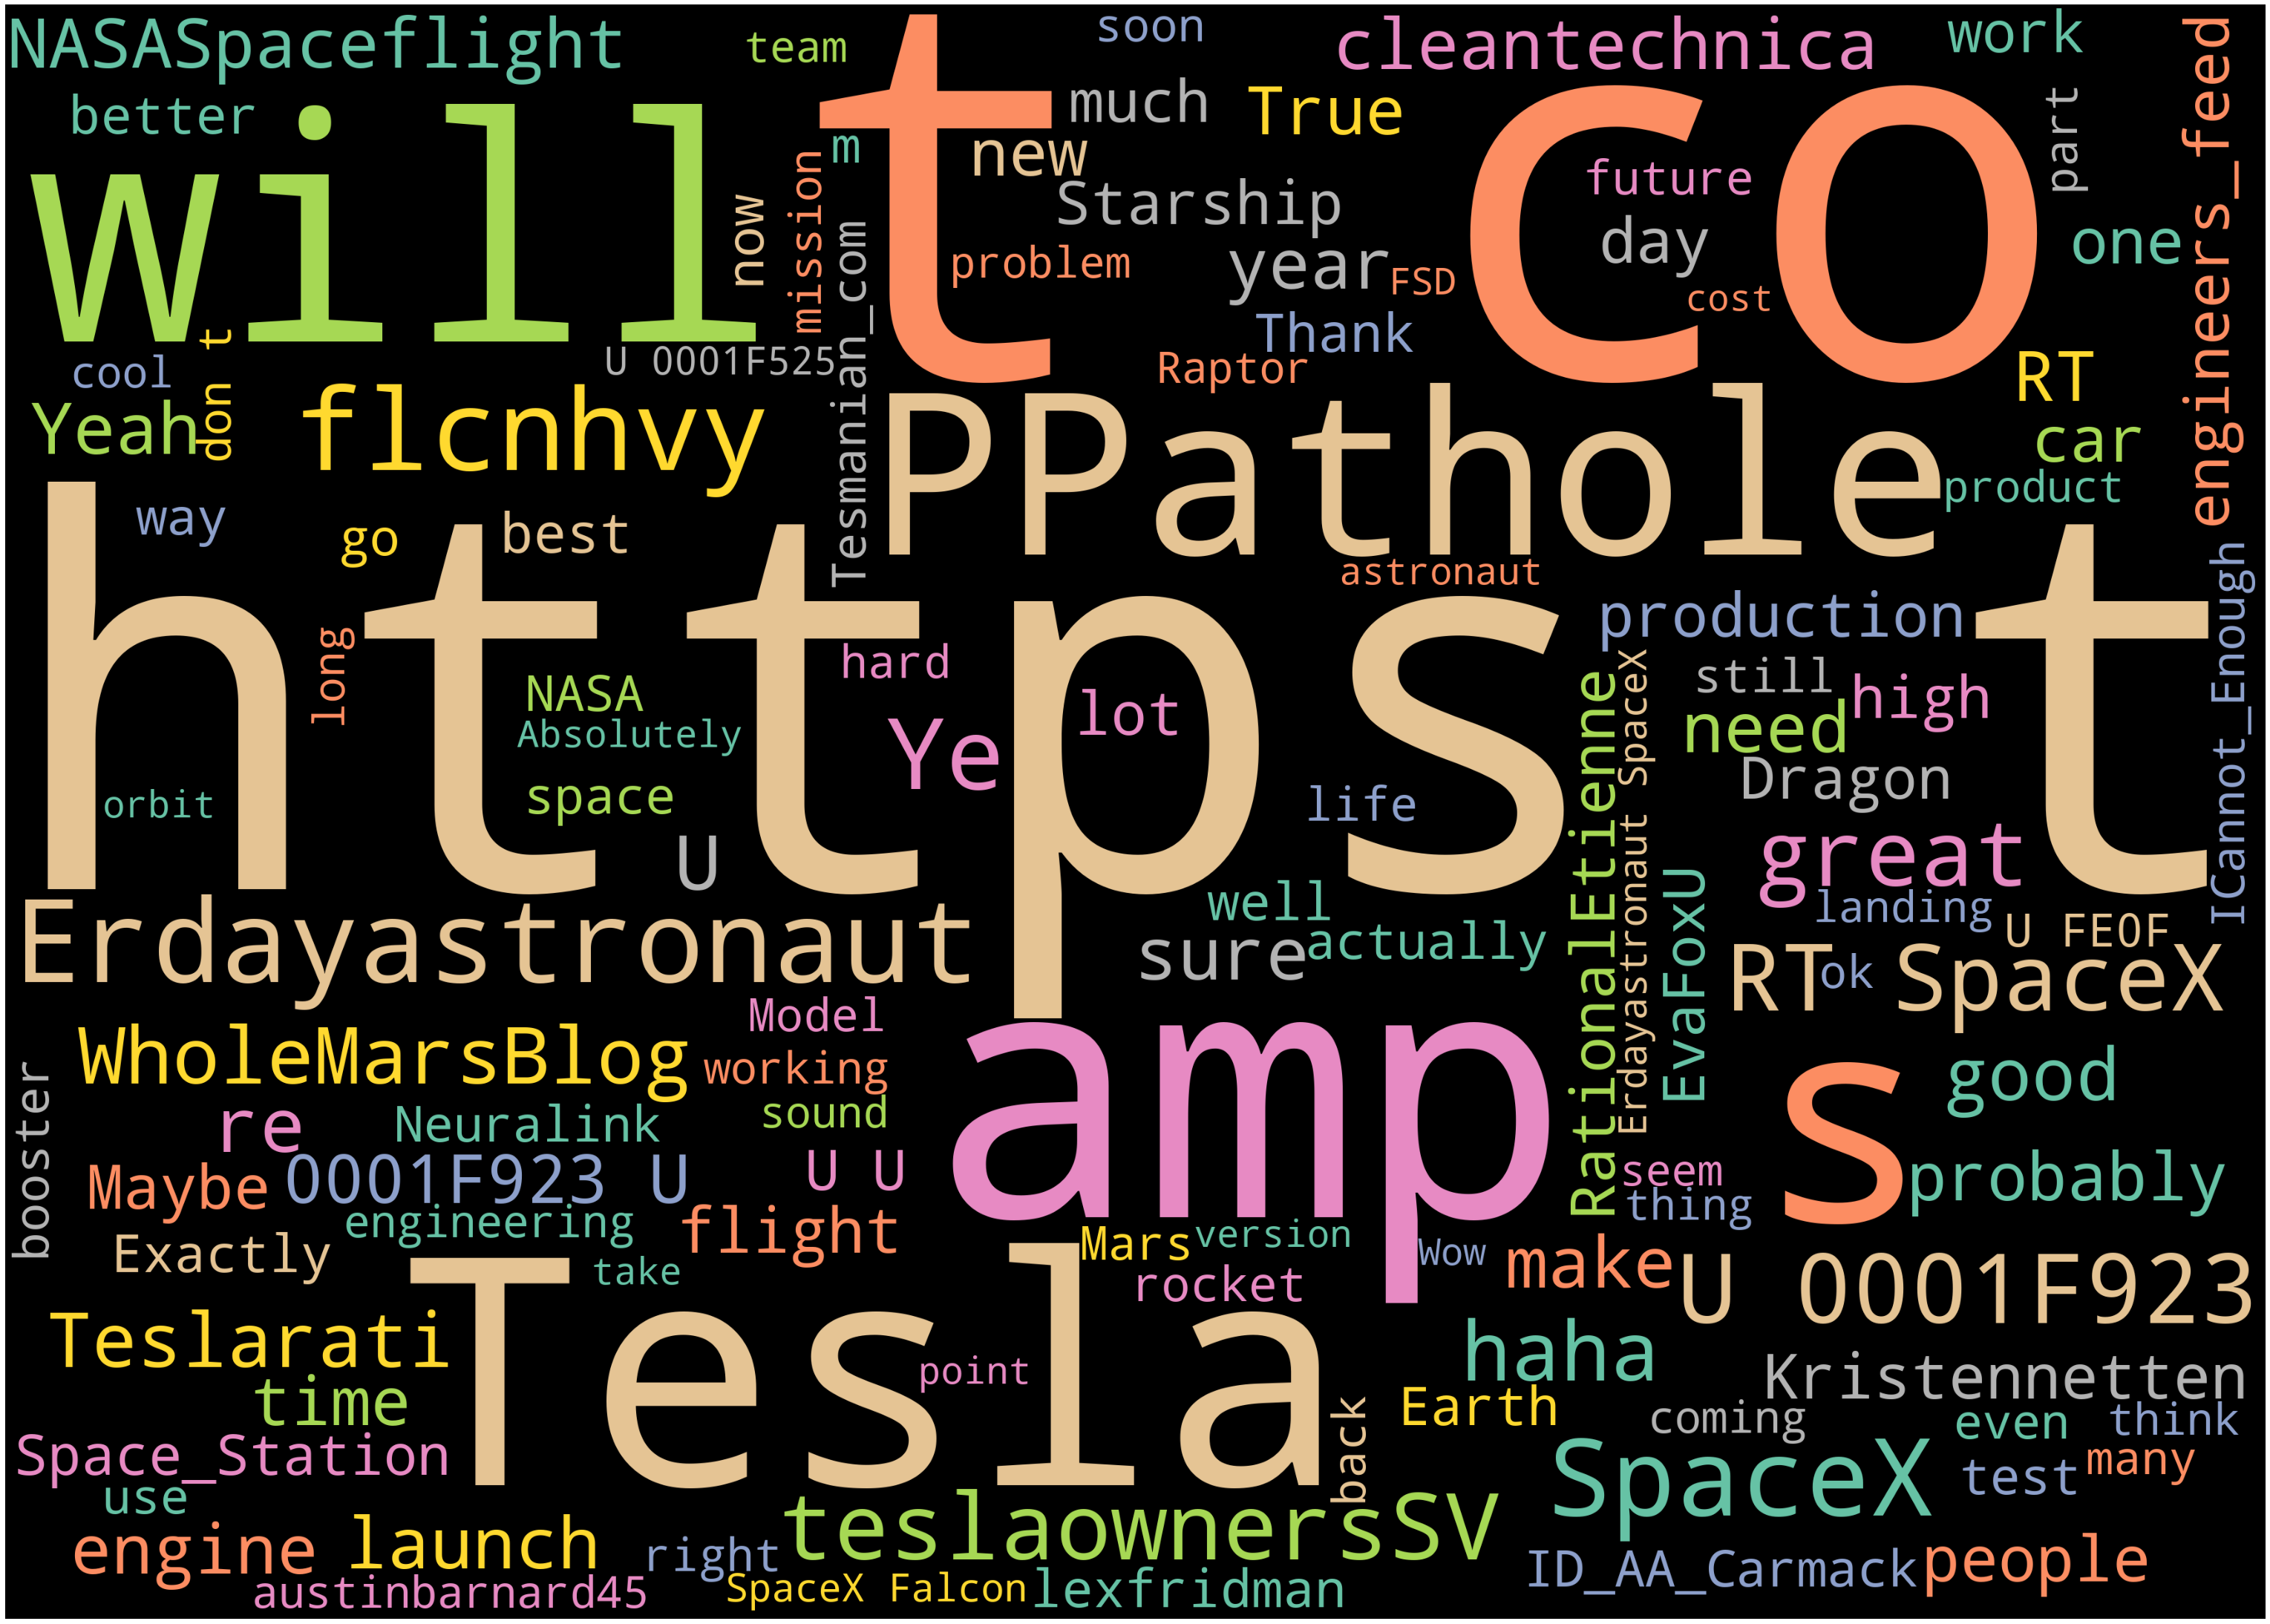

In [112]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500, 
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [113]:
musk2 = pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines = False)
musk2

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [114]:
musk2 = musk2['Text']
musk2

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [115]:
musk2 = [x.strip() for x in musk2] # remove both the leading and the trailing characters
musk2 = [x for x in musk2 if x] # removes empty strings, because they are considered in Python as False
musk2[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [116]:
one_block = musk2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [117]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [118]:
for token in doc_block[:]:
    print(token, token.pos_)

@ID_AA_Carmack PROPN
Ray PROPN
tracing NOUN
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- ADJ
level ADJ
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [119]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['tracing', 'tried']

In [120]:
len(nouns_verbs)

2

In [121]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [122]:
X.shape

(2, 2)

In [123]:
X.toarray()

array([[1, 0],
       [0, 1]], dtype=int64)

In [124]:
cv.get_feature_names()

['tracing', 'tried']

In [125]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
temp_df

,tracing,tried
0,1,0
1,0,1


In [126]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 1]], dtype=int64)

In [127]:
type(sum_words)

numpy.matrix

In [128]:
cv.vocabulary_

{'tracing': 0, 'tried': 1}

In [129]:
sorted(cv.vocabulary_)

['tracing', 'tried']

In [130]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names(),
                      'count' : np.array(sum_words).flatten()})
wf_df

,word,count
0,tracing,1
1,tried,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

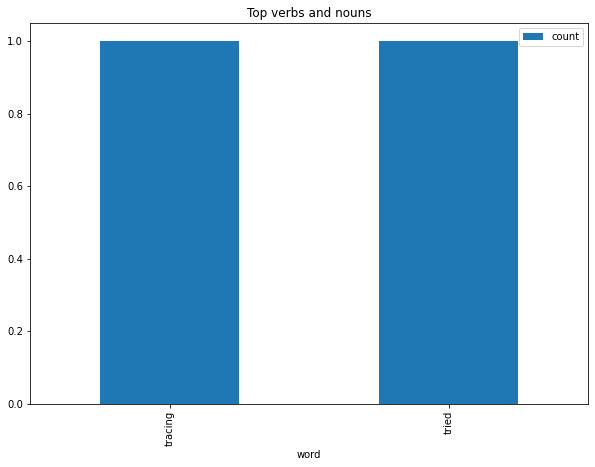

In [131]:
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')

In [132]:
#Sentiment analysis
rohu = pd.read_csv('Afinn.csv', 
                   error_bad_lines=False, 
                   sep = ",", 
                   encoding = 'latin-1')
rohu

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [133]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(musk2))

#sentences[5:15]
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [146]:
#Sentiment analysis
rohu = pd.read_csv('Afinn.csv', 
                   error_bad_lines=False, 
                   sep = ",", 
                   encoding = 'latin-1')
rohu

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [147]:
rohu[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [148]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [149]:
affinity_scores = rohu.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [150]:
nlp = spacy.load('en_core_web_trf')

In [151]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [152]:

# test that it works
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [153]:
calculate_sentiment(text = 'wonderful session')

4

In [154]:
calculate_sentiment(text = 'great job, best explanation ever')

6

In [155]:
calculate_sentiment(text = 'good')

3

In [156]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [157]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [158]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

Token indices sequence length is longer than the specified maximum sequence length for this model (548 > 512). Running this sequence through the model will result in indexing errors


In [159]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,5
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [160]:
sent_df.iloc[4,0]

'Now on to the next for even more!!'

In [161]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,5,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [162]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
224,"@PPathole @karpathy For a second there, I thou...",11,69
159,@harsimranbansal @heydave7 It will most likely...,11,93
42,"@thejackbeyer @NASASpaceflight Cryoproof, then...",12,84
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,13,138
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
719,We just havent observed the https://t.co/mez...,17,72


In [163]:
sent_df.sort_values(by='sentiment_value').head(15)

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-5,61
680,"Occasional flights from land are ok, but frequ...",-4,39
611,"Then static fire, checkouts, static fire, fly ...",-4,12
920,"It may never pay out, as the stock cant b ht...",-4,31
296,"No symptoms for past few days, apart from fati...",-3,9
380,No problem if theres a way get current design...,-3,13
500,@tesladri @ChananBos @raytech247 @WholeMarsBlo...,-3,38
816,"Connector damaged in the storm, but fixed now.",-3,8


In [164]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.550866
std        2.855989
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [165]:

# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
8,Tweets definitely do not represent real-world ...,0,8


In [166]:
sent_df[sent_df['sentiment_value']<-5]

,sentence,sentiment_value,word_count
64,"Also, the road to hell is mostly paved with ba...",-7,11
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60


In [167]:

sent_df[sent_df['sentiment_value']<-5].head()['sentence']

64     Also, the road to hell is mostly paved with ba...
647    Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...
Name: sentence, dtype: object

In [168]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.']

In [169]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [170]:

sent_df['index'] = range(0, len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

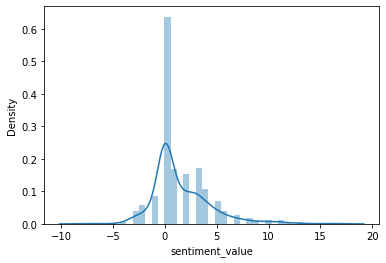

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

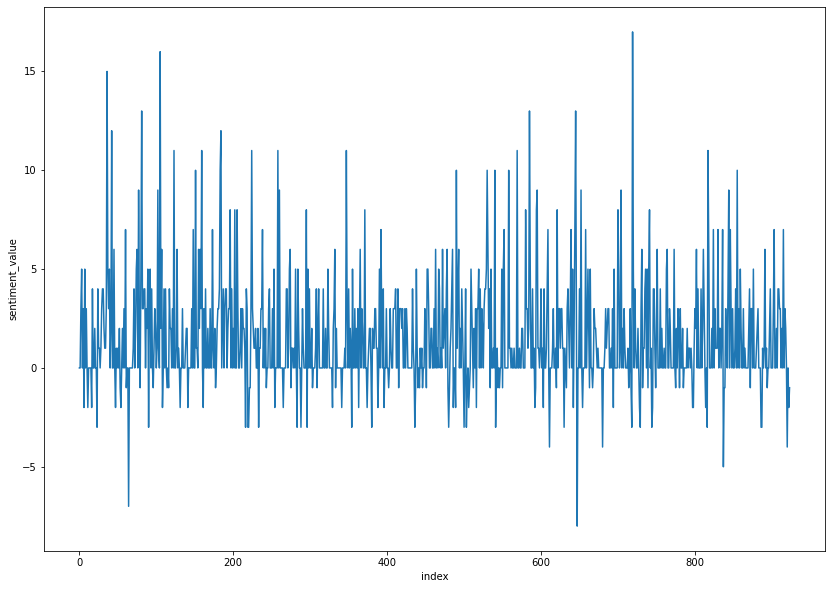

In [172]:

plt.figure(figsize=(14, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

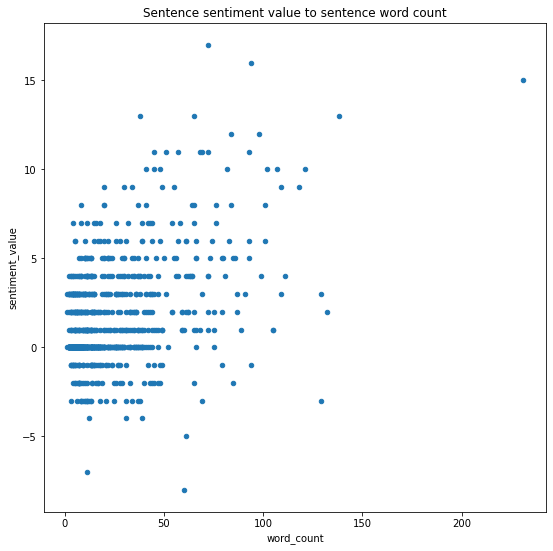

In [173]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(9,9),
                     title='Sentence sentiment value to sentence word count')

In [174]:
# PW for positive words 
# NW for Negative Words 

In [175]:
PW=pd.read_csv('positive-words.txt', 
               error_bad_lines = False)
PW

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [176]:
NW=pd.read_csv('negative-words.txt', 
               error_bad_lines = False,
               encoding='latin-1')
NW

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [177]:
PW =PW.iloc[25:]
PW =PW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
PW.reset_index(inplace=True)
PW =PW.drop('index',axis=1)
PW['Score'] = 1
PW

,Words,Score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [178]:
NW = NW.iloc[25:]
NW = NW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
NW.reset_index(inplace=True)
NW = NW.drop('index',axis=1)
NW['Score'] = -1
NW

,Words,Score
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [179]:
affinity_scores1 = PW.set_index('Words')['Score'].to_dict()
affinity_scores2 = NW.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [180]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [181]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [182]:
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,1,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,1,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-1,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,922


In [183]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,1,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,1,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-1,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,922


In [184]:
sent_df.sort_values(by='sentiment_value').tail()

,sentence,sentiment_value,word_count,index
719,We just havent observed the https://t.co/mez...,5,72,719
371,@Chad_Hurley @realDonaldTrump @kanyewest Stop ...,6,65,371
105,@Erdayastronaut @SpaceX Was also thinking that...,6,94,105
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",6,231,36
652,"Its not useful for predicting the future, nor...",9,118,652


In [185]:
sent_df.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,word_count,index
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-5,60,647
886,This is primarily an electrical/electronic (ch...,-4,69,886
363,4D is essential for dynamically occluded objec...,-3,45,363
156,We couldnt get everything done in https://t....,-3,65,156
240,@RationalEtienne @ShyCybertruck Fate loves iro...,-3,42,240


In [186]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       0.495671
std        1.280313
min       -5.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [187]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

,sentence,sentiment_value,word_count,index
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-1,14,6
11,"However, if we don https://t.co/9Z8Ac6skqx @R...",-1,40,11
16,Thats what youre missing.,-1,4,16
23,https://t.co/UEEocOfcTb The people have spoken...,-1,37,23
30,The Second Last Kingdom https://t.co/Je4EI88Hm...,-1,38,30


In [188]:
sent_df[sent_df['sentiment_value']<-1]

,sentence,sentiment_value,word_count,index
55,You https://t.co/6gO7EHq9qy @avalonpenrose A ...,-2,30,55
64,"Also, the road to hell is mostly paved with ba...",-2,11,64
67,Only o https://t.co/CeoFLi8Lzm @Megaconstella...,-2,39,67
96,Dragon performing 3 departure burns to move aw...,-2,31,96
156,We couldnt get everything done in https://t....,-3,65,156
208,Watch as the NASA @SpaceX cargo resupply missi...,-2,17,208
219,@RGVaerialphotos It will be real soon @MarcusH...,-2,18,219
220,External https://t.co/csIZk6sEVu @bcart03 @ne...,-2,31,220
240,@RationalEtienne @ShyCybertruck Fate loves iro...,-3,42,240
296,"No symptoms for past few days, apart from fati...",-2,9,296


In [189]:
sent_df[sent_df['sentiment_value']<-1].head(20)['sentence']

55     You
 https://t.co/6gO7EHq9qy @avalonpenrose A ...
64     Also, the road to hell is mostly paved with ba...
67     Only o
 https://t.co/CeoFLi8Lzm @Megaconstella...
96     Dragon performing 3 departure burns to move aw...
156    We couldnt get everything done in
 https://t....
208    Watch as the NASA @SpaceX cargo resupply missi...
219    @RGVaerialphotos It will be real soon @MarcusH...
220    External
 https://t.co/csIZk6sEVu @bcart03 @ne...
240    @RationalEtienne @ShyCybertruck Fate loves iro...
296    No symptoms for past few days, apart from fati...
304    Last week, I had sym
 https://t.co/gL0mhrqJxY ...
329    Their main PCR search is for the N1 gene, uniq...
352    https://t.co/OPouohyAmu RT @SpaceX: Crew Drago...
363    4D is essential for dynamically occluded objec...
374    The Model 3 ramp was extreme stress &amp; pa
 ...
391    Transferring propellant
 https://t.co/vPIIPpDV...
436    @SpaceX Just a small-seeming issue with loss o...
525    Hollywood should just st

In [190]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

['You\x85 https://t.co/6gO7EHq9qy @avalonpenrose A hedge fund that shorts is a shrubbery @lafebra @Gfilche https://t.co/M0WwQSTAXm @lafebra @Gfilche Yeah, also a rear screen 0 to 155mph trap speed in a 1/4 mile.',
 'Also, the road to hell is mostly paved with bad intentions.',
 'Only o\x85 https://t.co/CeoFLi8Lzm @Megaconstellati @Aviation_Intel @jetcitystar @larrypress Yup @TeslaGong @teslaownersSV @cleantechnica I hope so @Tesmanian_com These also have laser links between the satellites, so no ground stations are needed over the poles @teslaownersSV @cleantechnica Sorry for the version confusion.',
 'Dragon performing 3 departure burns to move away from the @Space_Station https://t.co/G27ohWvnXj @lexfridman Suicide is more than double homicide https://t.co/MvWGPs9uQE @lexfridman Absolutely Hey you \x85\nYeah you Queen \x85\nYou\x92re gonna make it!',
 'We couldn\x92t get everything done in\x85 https://t.co/7HkZA1OhE4 @westcoastbill The writing on Cobra Kai is sick<U+0001F44C> @Afloat

In [191]:
sent_df['index'] = range(0, len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

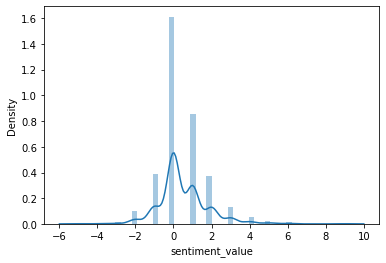

In [192]:
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

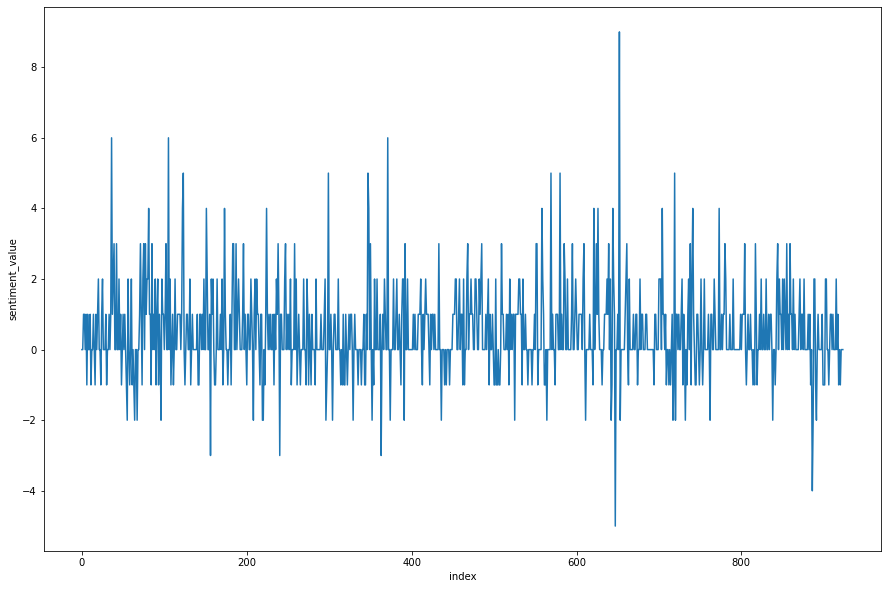

In [193]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

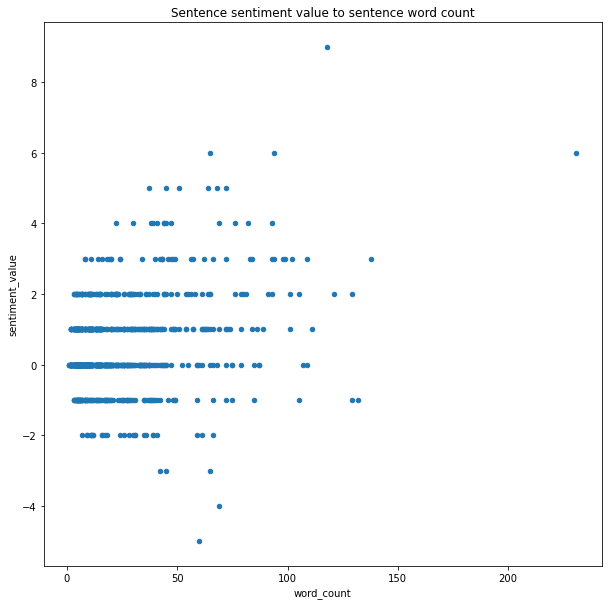

In [194]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,10),
                     title='Sentence sentiment value to sentence word count')